# lab 9 Fmnist dataset prediction

In [190]:
# Use Keras Datasets, obtain the fMNIST data set. Explore and describe it as you would do with any new dataset that you start working with 
# (e.g. number of samples, number of classes, number of features, etc.).
#import dataset from keras
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist as fMNIST
import tensorflow as tf



# Load the data as iamage and labels
(train_images, train_labels), (test_images, test_labels) = fMNIST.load_data()
# Print the shape of the data
print("Shape of train_images: ", train_images.shape)
print("Shape of train_labels: ", train_labels.shape)
print("Shape of test_images: ", test_labels[0])

Shape of train_images:  (60000, 28, 28)
Shape of train_labels:  (60000,)
Shape of test_images:  9


In [191]:
print(f'Image DType: {type(train_images)}')
print(f'Image Element DType: {type(train_images[0,0,0])}')
print(f'Label Element DType: {type(train_labels[0])}')
print('**Shapes:**')
print('Train Data:')
print(f'Images: {train_images.shape}')
print(f'Labels: {train_labels.shape}')
print('Test Data:')  # the text images should be a random sample of the overall test set, and hence should have the same type, shape and image-size as the overall train set
print(f'Images: {test_images.shape}')
print(f'Labels: {test_labels.shape}')
print('Image Data Range:')
print(f'Min: {train_images.min()}')
print(f'Max: {train_images.max()}')

Image DType: <class 'numpy.ndarray'>
Image Element DType: <class 'numpy.uint8'>
Label Element DType: <class 'numpy.uint8'>
**Shapes:**
Train Data:
Images: (60000, 28, 28)
Labels: (60000,)
Test Data:
Images: (10000, 28, 28)
Labels: (10000,)
Image Data Range:
Min: 0
Max: 255


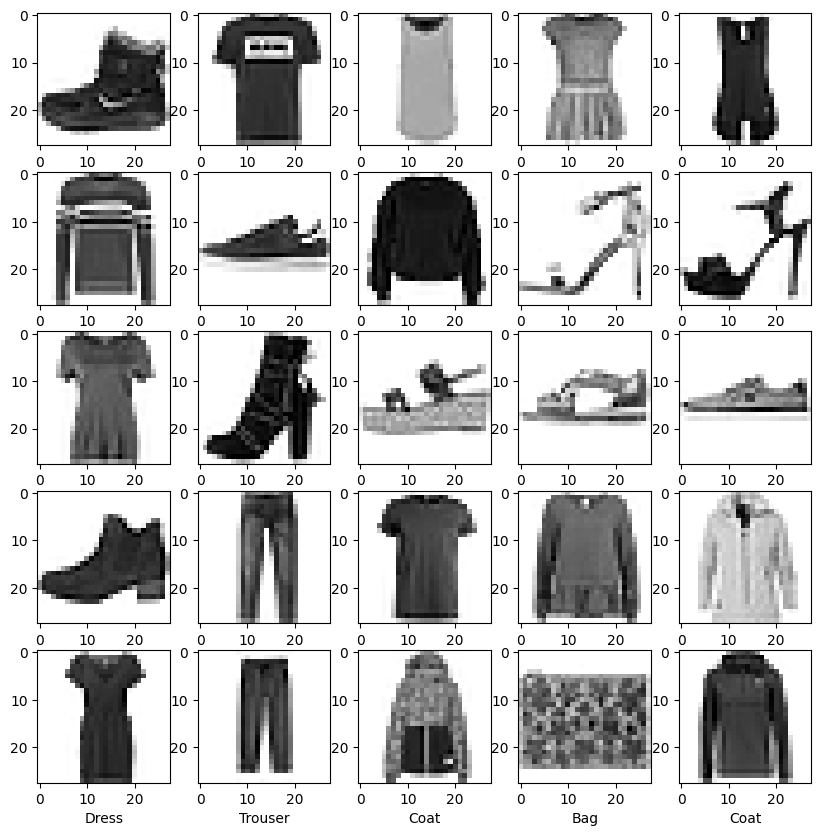

In [192]:
import matplotlib.pyplot as plt
labels={
    0:'T-shirt/top',
    1:'Trouser',
    2:'hoodie',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'boot',
    8:'Bag',
    9:'Ankle boot'
}
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
   
    plt.imshow(train_images[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(labels[train_labels[i]])

## test data

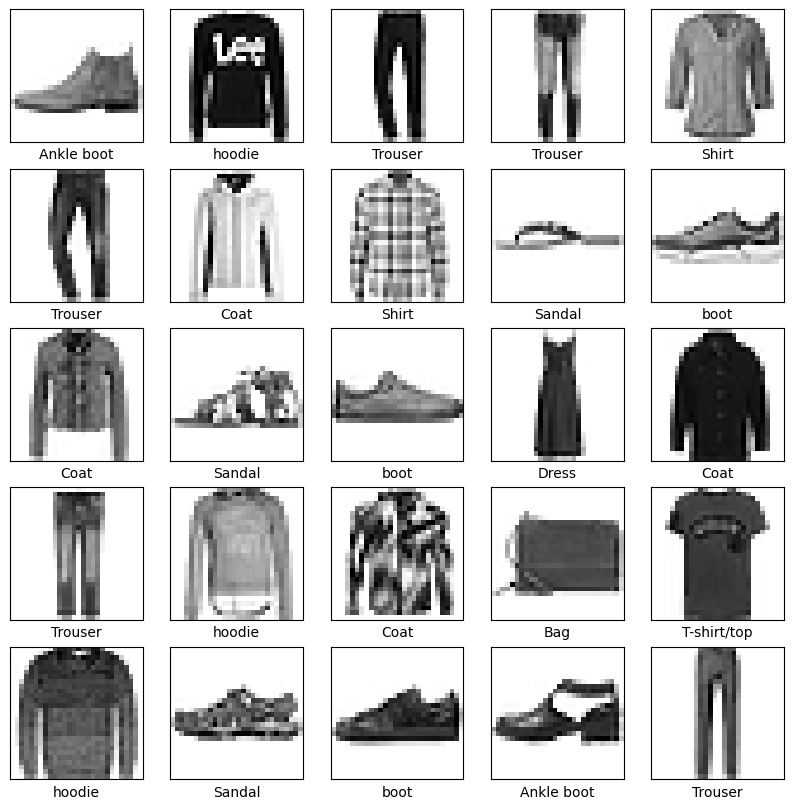

In [193]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(test_images[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(labels[test_labels[i]])

In [194]:
train_labels[9]

5

## checkking the length 

In [195]:
# Print the number of training and test datasets
print("Number of training datasets: ", len(train_images))
print("Number of test datasets: ", len(test_images))



Number of training datasets:  60000
Number of test datasets:  10000


scaling the images

In [196]:
train_images = train_images.reshape((60000, 28 * 28))  # flattening the 28x28 image into dim=1 (784,) vector (and over all images in the training set)
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype("float32") / 255  # normalizing the data to the range [0,1] by min-max range, and casting it to float32
test_images = test_images.astype("float32") / 255

# making the model

In [197]:
#Train a dense neural network using Keras
# Import the necessary components from Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import utils

from tensorflow.keras import layers

# Build the model
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Compile the model

model.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# Fit the model
model.fit(train_images, train_labels, epochs=10, batch_size=32, verbose=1)



# Evaluate the model
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



Epoch 1/10
1875/1875 [==============================] - 29s 14ms/step - loss: 0.4748 - accuracy: 0.8290
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3595 - accuracy: 0.8688
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3237 - accuracy: 0.8803
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2980 - accuracy: 0.8897
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2787 - accuracy: 0.8960
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2641 - accuracy: 0.9007
Epoch 7/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2506 - accuracy: 0.9075
Epoch 8/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2395 - accuracy: 0.9111
Epoch 9/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2314 - accuracy: 0.9137
Epoch 10/10
1875/1875 [==============================] - 26s 14m

## predicting the values

In [198]:
# Evaluate its accuracy. Report accuracy, confusion metric, explore specific examples of incorrect classification, and drew some conclusions from this exploration
# Predict the values from the validation dataset


# import confusion matrix for tensorflow

import numpy as np
import matplotlib.pyplot as plt
y_pred = model.predict(test_images[9:10])
# Convert predictions classes to one hot vectors
y_pred.argmax()
# Convert validation observations to one hot vectors
y_true = test_labels
# confusion matrix for tensorflow
y_pred[0]
y_pred.argmax()

    



1/1 [==============================] - 0s 153ms/step


7

In [199]:
y_pred[0,7]

0.9999927

In [200]:
test_labels[9]

7

## confusion matrix

In [201]:
y_test_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_test_pred,axis = 1)

y_pred_classes[0]

confusionmatrix =tf.math.confusion_matrix(y_true, y_pred_classes, num_classes=10)
print(confusionmatrix)


313/313 [==============================] - 2s 4ms/step
tf.Tensor(
[[905   3   9  14   3   1  61   0   4   0]
 [  5 967   0  21   4   0   1   0   2   0]
 [ 57   0 793   8 100   0  42   0   0   0]
 [ 36   4   8 910  18   0  20   0   4   0]
 [  7   0  86  48 832   0  27   0   0   0]
 [  0   0   0   1   0 953   0  21   2  23]
 [192   0  94  27 111   0 569   0   7   0]
 [  0   0   0   0   0   6   0 967   2  25]
 [  7   0   0   6   1   1   4   2 979   0]
 [  0   0   0   1   0   4   1  29   0 965]], shape=(10, 10), dtype=int32)


#explain the confusion matrix?
ans:
 The confusion matrix shows the number of correct and incorrect predictions made by the classification model compared to the actual outcomes (target value) in the data. The matrix is NxN, where N is the number of target values (classes). Performance of such models is commonly evaluated using the data in the matrix. The following table is a 2x2 confusion matrix for two classes (positive and negative):



## visualizing the incorect data

number of incorrect predictions:  1160


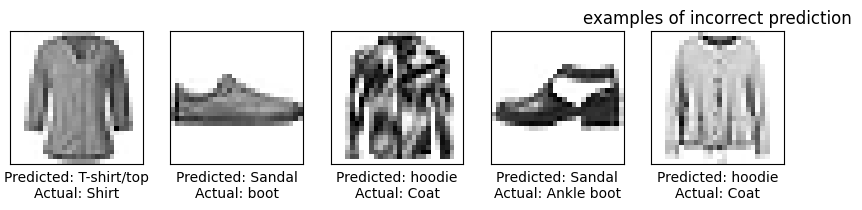

In [209]:
# FOR LOOP TO PRINT THE FIRST 10 IMAGES with their labels in one
incorrects = np.nonzero( y_pred_classes != test_labels)[0]
print("number of incorrect predictions: ", len(incorrects))
#plot the incorrect predictions
plt.figure(figsize=(10,10))
for i, incorrect in enumerate(incorrects[:5]):
   
    plt.subplot(5,5,i+1)
    
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[incorrect].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel("Predicted: " + labels[y_pred_classes[incorrect]] + "\nActual: " + labels[test_labels[incorrect]])
plt.title("examples of incorrect prediction")
plt.show()




In [204]:
# make a for loop and find the images that are not correctly classified just 10 show

